In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m

In [31]:
mckenzie = m.lithologies.mckenzie.lherzolite(DeltaS=250)
T = np.linspace(1100, 2100, 501)
mckenzie_F = [mckenzie.F(3.0, i) for i in T]
P = np.linspace(0.0, 9.0, 91)
mckenzie_solidus = [mckenzie.TSolidus(p) for p in P]
mckenzie_liquidus = [mckenzie.TLiquidus(p) for p in P]

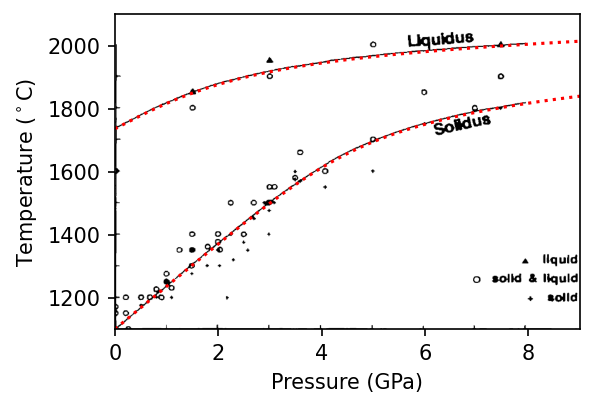

In [32]:
f, a = plt.subplots(figsize=(4.00, 2.78), dpi=150)

pub = plt.imread('figures/mckenzie_fig5.png')

a.set_xlim(0.0, 9.0)
a.set_ylim(1100, 2100)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(P, mckenzie_solidus, c='r', ls=':')
a.plot(P, mckenzie_liquidus, c='r', ls=':')

a.set_ylabel('Temperature ($^\circ$C)')
a.set_xlabel('Pressure (GPa)')

plt.show()

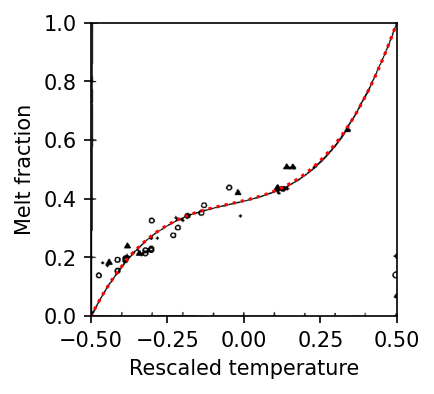

In [33]:
def TRescaled(T, P):
    TRescaled = (T-((mckenzie.TLiquidus(P)+mckenzie.TSolidus(P))*0.5))/(mckenzie.TLiquidus(P)-mckenzie.TSolidus(P))
    return TRescaled

TRescaled_mckenzie = [TRescaled(i,3.0) for i in T]

f, a = plt.subplots(figsize=(2.63, 2.59), dpi=150)

pub = plt.imread('figures/mckenzie_fig6.png')

a.set_xlim(-0.5, 0.5)
a.set_ylim(0.0, 1.0)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(TRescaled_mckenzie, mckenzie_F, c='r',ls=':')

a.set_xlabel('Rescaled temperature')
a.set_ylabel('Melt fraction')

plt.show()


C:\Users\user\Desktop\pyMelt comparisons\pyMelt\mantle_class.py:470: UserWarning: Freezing prevented.
  warn("Freezing prevented.")


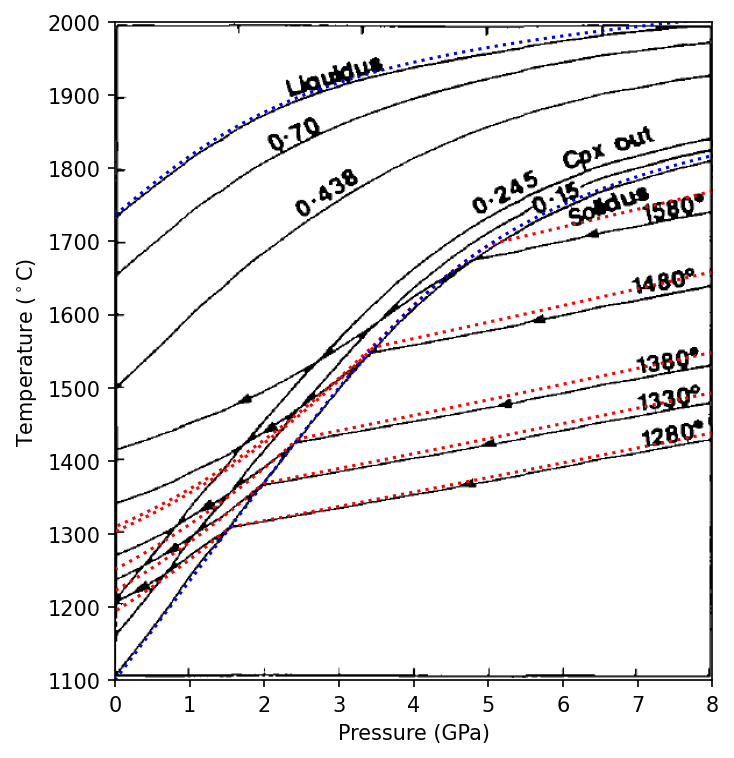

In [37]:
mantle = m.mantle([mckenzie],[1],['Lz'])

f, a = plt.subplots(figsize=(5.14, 5.81), dpi=150)
pub = plt.imread('figures/mckenzie_fig7a.png')

a.set_xlim(0.0, 8.0)
a.set_ylim(1100, 2000)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

for i in [1280, 1330, 1380, 1480, 1580]:
    column = mantle.adiabaticMelt(i, Pstart=8.0)
    a.plot(column.P, column.T, c='r', ls=':')

a.plot(P, mckenzie_solidus, c='b', ls=':')
a.plot(P, mckenzie_liquidus, c='b', ls=':')

a.set_xlabel('Pressure (GPa)')
a.set_ylabel('Temperature ($^\circ$C)')

plt.show()    
